In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [4]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [5]:
df.shape

(919288, 20)

In [6]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [7]:
target_names = 'set_num set_name theme_id num_parts set_num_len set_name_len theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'num_parts',
 'set_num_len',
 'set_name_len',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [8]:
model = LogisticRegression()

In [9]:
fn_over = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)

In [10]:
X = df[fn_over]
y = df['is_ninjago']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [12]:
df_train = pd.concat([pd.DataFrame(X_train, columns=fn_over), pd.DataFrame(y_train, columns=['is_ninjago'])], axis=1)

In [13]:
df_test = pd.concat([pd.DataFrame(X_test, columns=fn_over), pd.DataFrame(y_test, columns=['is_ninjago'])], axis=1)

In [14]:
print(df_train.shape)
print(df_test.shape)

(827359, 8)
(91929, 8)


In [15]:
df_grouped_train = df_train.groupby('is_ninjago')

df_grouped_train.head()

,year,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
774631,2014,15,1,0,11,5,59,0
417226,2013,0,1,0,5,5,45,0
414960,2010,0,1,0,5,5,57,0
896798,2008,0,2,0,4,5,12,0
591153,2007,70,3,0,6,13,53,0
555268,2016,2,3,0,4,5,11,1
575778,2015,19,1,0,5,3,27,1
576490,2015,0,1,0,6,5,54,1
612760,2020,27,8,0,4,4,33,1
567503,2019,0,2,0,5,5,43,1


In [16]:
print(df_grouped_train.size())

is_ninjago
0    795565
1     31794
dtype: int64


In [17]:
list(df_grouped_train)[0][1]

lengths = []

for is_ninjago, group in df_grouped_train:
    lengths.append(group.shape[0])
    
print(lengths)

[795565, 31794]


In [18]:
dfs_train = list()

for is_ninjago, group in df_grouped_train:
    dfs_train.append(group.sample(max(lengths), replace=True))
    
dfs_train

[        year  color_id  quantity  is_trans  part_num_len  color_name_len  \
 513984  2012       272         2         0             5               9   
 843652  2006        15        34         0             4               5   
 363145  2011        71         2         0             4              17   
 769334  2012         0         1         0            15               5   
 887605  2012        47         1         1             4              11   
 ...      ...       ...       ...       ...           ...             ...   
 908747  2014        19         1         0             5               3   
 722204  2019        14         1         0             6               6   
 462766  1990         7         2         0             4              10   
 101585  2021       191         2         0             5              19   
 15776   2009        19        14         0             4               3   
 
         part_name_len  is_ninjago  
 513984             52           0  


In [19]:
df_balancedbyover = pd.concat(dfs_train)
df_balancedbyover.head()

,year,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
513984,2012,272,2,0,5,9,52,0
843652,2006,15,34,0,4,5,11,0
363145,2011,71,2,0,4,17,22,0
769334,2012,0,1,0,15,5,72,0
887605,2012,47,1,1,4,11,32,0


In [20]:
df_balancedbyover.shape

(1591130, 8)

In [21]:
hyper_table_df_grouped = list()
fn_over = list()
for i, name in tqdm(enumerate(df_balancedbyover.columns), total=len(df_balancedbyover.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)
    model.fit(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])

    s_train = model.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    s_test = model.score(df_test[fn_over], df_test['is_ninjago'])
    y_pred = model.predict(df_test[fn_over])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)
    conf_matrix

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)
    
    hyper_table_df_grouped.append(dict(sample='over', 
                         desc=str(fn_over), 
                         train_score=s_train, 
                         test_score=s_test, 
                         precision=precision,
                         recall=recall,
                         accuracy=accuracy,
                         f1_score=f1,
                         model=model, 
                         num_features=df_balancedbyover[fn_over].shape[1], 
                         num_rows_train=df_balancedbyover.shape[0],
                         num_rows_test=df_test.shape[0],
                         last_feature=fn_over[-1]))

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:17<00:03,  3.24s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
8it [00:32,  4.07s/it]                                                                                                 


In [22]:
model_rf = RandomForestClassifier(n_estimators=200, random_state = 1, n_jobs=-1)

In [23]:
fn_over = list()
for i, name in tqdm(enumerate(df_balancedbyover.columns), total=len(df_balancedbyover.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)
    model_rf.fit(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    
    s_train = model_rf.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    s_test = model_rf.score(df_test[fn_over], df_test['is_ninjago'])
    y_pred = model_rf.predict(df_test[fn_over])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)
    conf_matrix

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)
    
    hyper_table_df_grouped.append(dict(sample='over', 
                         desc=str(fn_over), 
                         train_score=s_train, 
                         test_score=s_test, 
                         precision=precision,
                         recall=recall,
                         accuracy=accuracy,
                         f1_score=f1,
                         model=model_rf, 
                         num_features=df_balancedbyover[fn_over].shape[1], 
                         num_rows_train=df_balancedbyover.shape[0],
                         num_rows_test=df_test.shape[0], 
                         last_feature=fn_over[-1]))

8it [14:30, 108.80s/it]                                                                                                


In [24]:
ht_dfg_over = pd.DataFrame(hyper_table_df_grouped).sort_values('test_score', ascending=False)
ht_dfg_over

,sample,desc,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
13,over,"['year', 'color_id', 'quantity', 'is_trans', '...",0.885157,0.791698,0.120692,0.670114,0.791698,0.204545,"(DecisionTreeClassifier(max_features='auto', r...",7,1591130,91929,part_name_len
3,over,"['year', 'color_id', 'quantity', 'is_trans']",0.572827,0.711582,0.060566,0.428416,0.711582,0.106129,LogisticRegression(),4,1591130,91929,is_trans
4,over,"['year', 'color_id', 'quantity', 'is_trans', '...",0.571718,0.710918,0.060188,0.426511,0.710918,0.105490,LogisticRegression(),5,1591130,91929,part_num_len
2,over,"['year', 'color_id', 'quantity']",0.573137,0.710755,0.060491,0.429232,0.710755,0.106038,LogisticRegression(),3,1591130,91929,quantity
11,over,"['year', 'color_id', 'quantity', 'is_trans', '...",0.797946,0.678110,0.096572,0.844311,0.678110,0.173320,"(DecisionTreeClassifier(max_features='auto', r...",5,1591130,91929,part_num_len
12,over,"['year', 'color_id', 'quantity', 'is_trans', '...",0.797946,0.678078,0.096664,0.845400,0.678078,0.173490,"(DecisionTreeClassifier(max_features='auto', r...",6,1591130,91929,color_name_len
1,over,"['year', 'color_id']",0.579348,0.673215,0.058475,0.475231,0.673215,0.104136,LogisticRegression(),2,1591130,91929,color_id
9,over,"['year', 'color_id', 'quantity']",0.780773,0.647989,0.091181,0.870713,0.647989,0.165076,"(DecisionTreeClassifier(max_features='auto', r...",3,1591130,91929,quantity
10,over,"['year', 'color_id', 'quantity', 'is_trans']",0.780773,0.647978,0.091202,0.870985,0.647978,0.165114,"(DecisionTreeClassifier(max_features='auto', r...",4,1591130,91929,is_trans
8,over,"['year', 'color_id']",0.764667,0.635186,0.089940,0.891399,0.635186,0.163395,"(DecisionTreeClassifier(max_features='auto', r...",2,1591130,91929,color_id


7


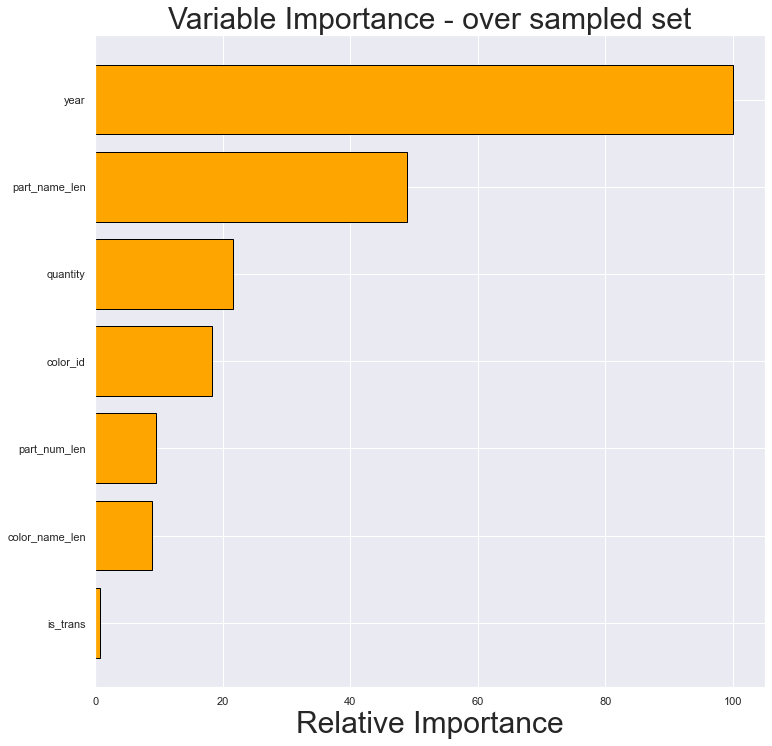

In [25]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df_balancedbyover[fn_over].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - over sampled set', fontsize=30)
plt.grid(True)
plt.show()

In [26]:
ht_dfg_over.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_over.csv', index=False)

In [27]:
hyper_table = list()

In [28]:
fn = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

fn

['year',
 'color_id',
 'quantity',
 'is_trans',
 'part_num_len',
 'color_name_len',
 'part_name_len']

In [29]:
model_rf = RandomForestClassifier(n_estimators=200, random_state = 1, n_jobs=-1)

In [30]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])

s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

In [31]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

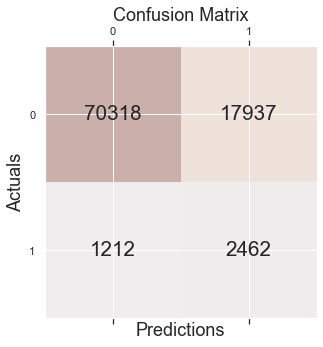

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [33]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

In [34]:
hyper_table.append(dict(sample='over', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0])) 

In [35]:
model_XGB = XGBClassifier(random_state=1)
model_XGB.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_XGB.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_XGB.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_XGB.predict(df_test[fn])
predictions = [round(value) for value in y_pred]

C:\Users\marki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

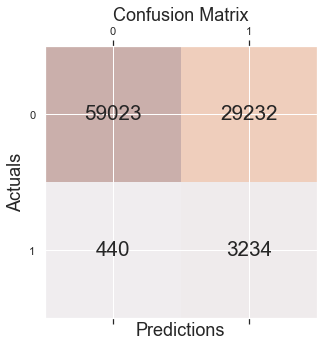

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

In [39]:
hyper_table.append(dict(sample='over', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_XGB, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [40]:
model_XGB = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.2, random_state=1)
model_XGB.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_XGB.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_XGB.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_XGB.predict(df_test[fn])
predictions = [round(value) for value in y_pred]

C:\Users\marki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

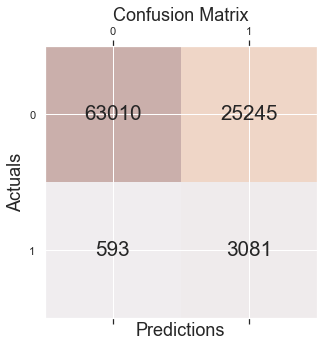

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

In [44]:
hyper_table.append(dict(sample='over', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_XGB, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [45]:
model_XGB.n_estimators

200

In [46]:
ht_fr = pd.DataFrame(hyper_table)
ht_fr

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,over,0.885157,0.791698,0.120692,0.670114,0.791698,0.204545,"(DecisionTreeClassifier(max_features='auto', r...",7,1591130,91929
1,over,0.789296,0.677229,0.099612,0.880240,0.677229,0.178971,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
2,over,0.827438,0.718935,0.108769,0.838596,0.718935,0.192563,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929


In [47]:
ht_fr.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_over.csv', index=False)